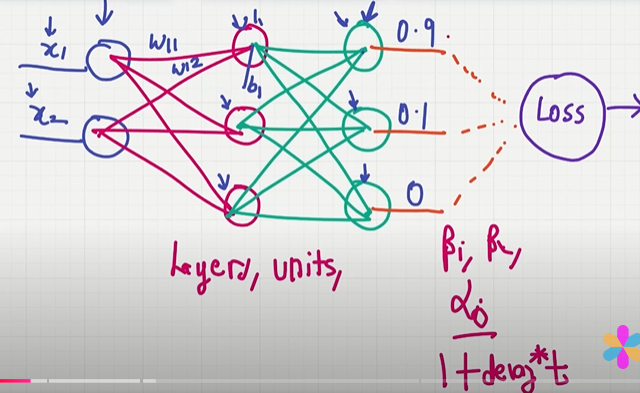

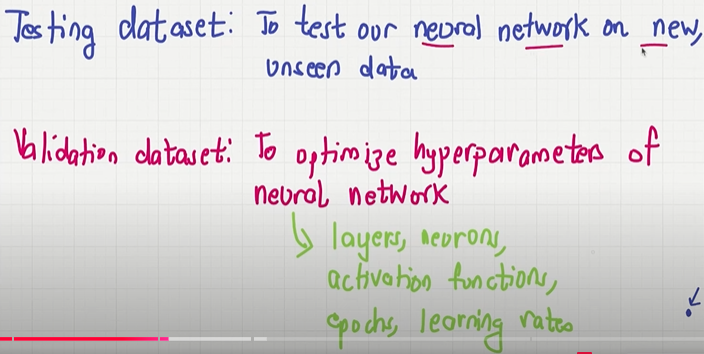

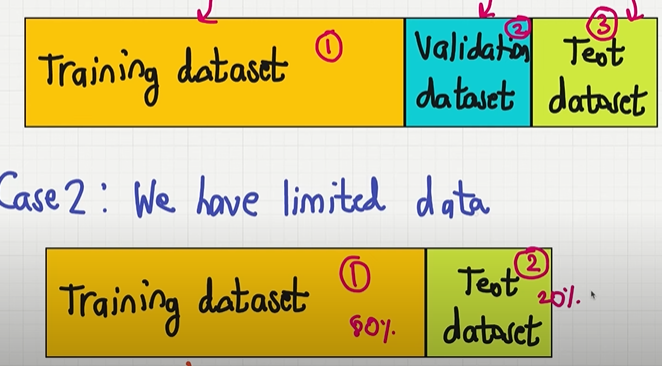

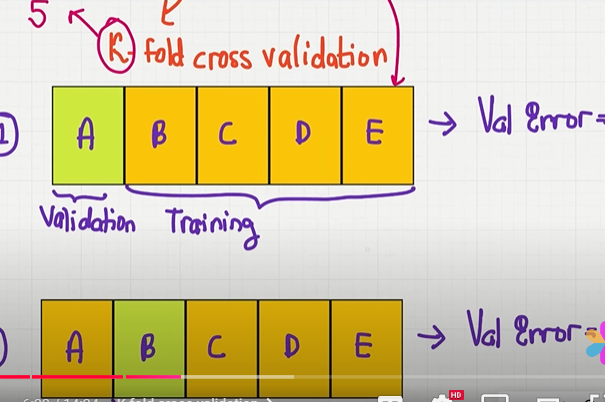

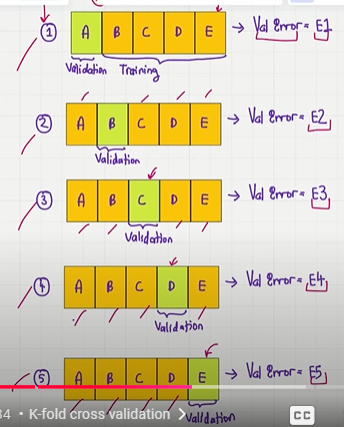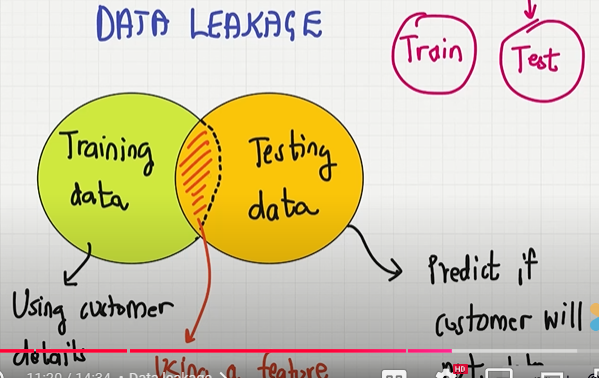

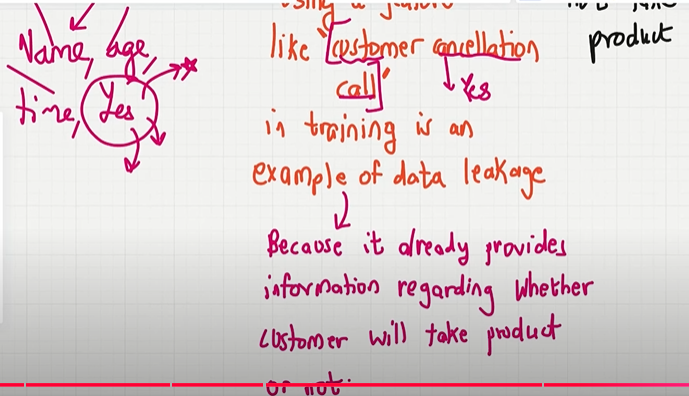

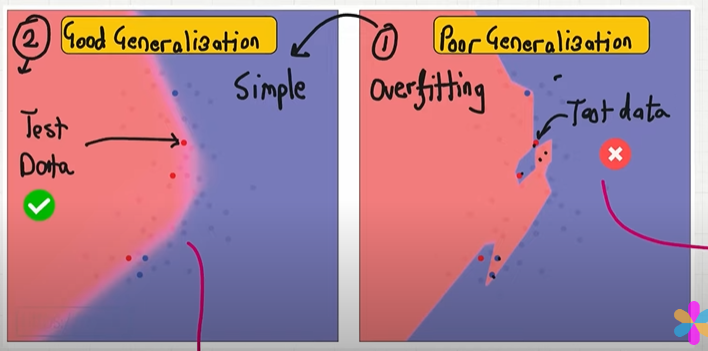

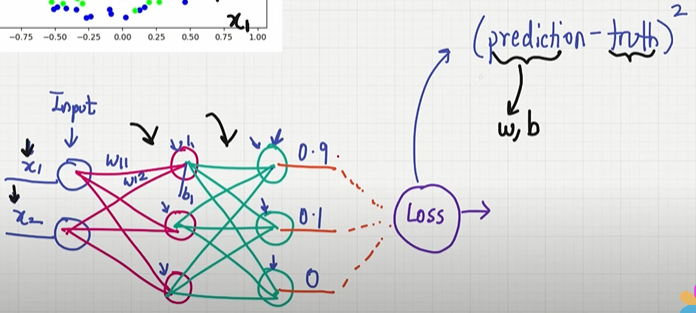

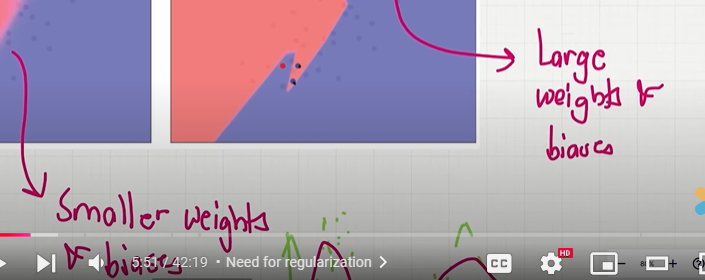

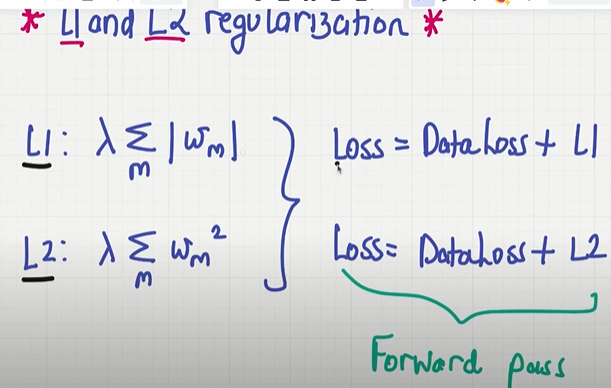

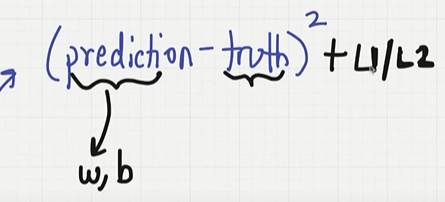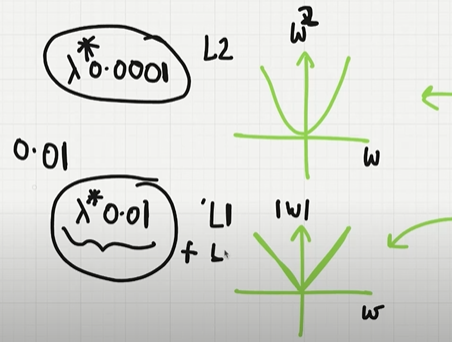

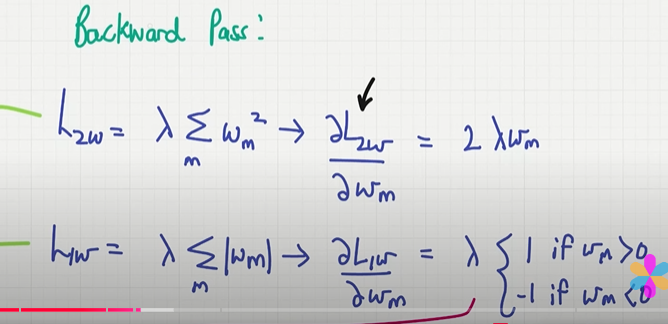

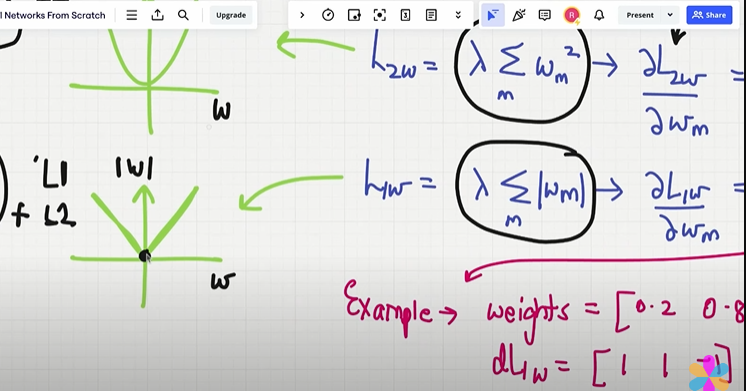

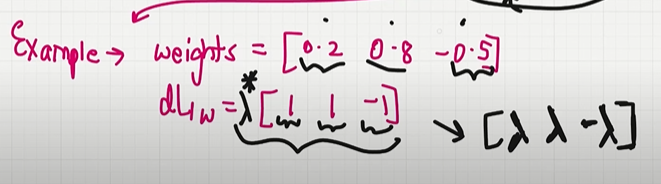

Modify the layer class to include the regularaization

In [4]:
import numpy as np

class Layer:
    # Layer initialization
    def __init__(self,  n_input, n_neurons,
                 weight_regularizer_l1 = 0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_input, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

regularaization loss

In [5]:
import numpy as np

class Loss:
    # Regularazation loss calculation
    def regularization_loss(self, layer):
        #0 by default
        regularization_loss = 0

        #L1 regularization - weights
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

        #L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

        #L1 regularization - biases
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

        #L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss

forward pass with regularization

In [ ]:
# calculate loss from output of activation2 (softmax activation)
data_loss = loss_function.forward(activation2.output,y)

#calculate regularization penalty
regularization_loss = loss_function.regularization_loss(dense1) + \
                     loss_function.regularization_loss(dense2)

# calculate total loss

total_loss = data_loss + regularization_loss


backward pass with regularization

In [ ]:
import numpy as np
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

creating a layer instance with regularization

In [ ]:
dense1 = Layer_Dense(2, 64, weight_regularizer_l2 = 5e-4, bias_regularizer_l2 = 5e-4)

The entire layer class with regularization - spelled out

In [8]:
# Dense layer
import numpy as np
import numpy as np
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # Forward pass
    def forward(self, inputs):
        # remember inputs values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

the entire loss class - spelled out

In [9]:
import numpy as np

#common loss classes

class Loss:
    # Regularization loss calculation
    def regularization_loss(self, layer):
        #0 by default
        regularization_loss = 0
        #L1 regularization - weights
        # Calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
        #L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
        #L1 regularization - biases
        # Calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
        #L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
        return regularization_loss
    
    # calculate the data and regularization losses
    # given model output and ground truth values
    def calculate_loss(self, model_output, y):
        # calculate loss from output of activation2 (softmax activation)
        data_loss = self.forward(model_output, y)
        # calculate regularization penalty
        # regularization_loss = self.regularization_loss(model_output)
        # # calculate total loss
        # total_loss = data_loss + regularization_loss
        # return total_loss
        data_loss = np.mean(data_loss)
        return data_loss
    


In [13]:
from nnfs.datasets import spiral_data
# from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
from SGD_optimizer import Optimizer_SGD
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
# from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
from ADAGRAD_optimizer import Optimizer_Adagrad
from RMSProp_optimizer import Optimizer_RMSprop
from Adam_optimizer import Optimizer_Adam

training a simple neural network with and without regularization

In [16]:
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
import numpy as  np

# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_Categorical_Crossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)  #dvalues: The derivative of the loss with respect to the output.
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1

        # dinputs = [[-10,  0,  0],
        #    [ 0, -2,  0],
        #    [ 0,  0, -1.11],
        #    [-10,  0,  0]]
        #     y_true = [0, 1, 2, 0]
        #     samples = 4

        # dinputs = [[-11,  0,  0],
        #    [ 0, -3,  0],
        #    [ 0,  0, -2.11],
        #    [-11,  0,  0]]

        # Normalize gradient
        self.dinputs = self.dinputs / samples

    def regularization_loss(self, layer):
        #0 by default
        regularization_loss = 0
        #L1 regularization - weights
        # Calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
        #L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
        #L1 regularization - biases
        # Calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
        #L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
        return regularization_loss
    
    # calculate the data and regularization losses
    # given model output and ground truth values
    def calculate_loss(self, model_output, y):
        # calculate loss from output of activation2 (softmax activation)
        data_loss = self.forward(model_output, y)
        # calculate regularization penalty
        # regularization_loss = self.regularization_loss(model_output)
        # # calculate total loss
        # total_loss = data_loss + regularization_loss
        # return total_loss
        data_loss = np.mean(data_loss)
        return data_loss
    


In [19]:
#create dataset
import numpy as np
X , y = spiral_data(samples=100, classes = 3)

# Create Dense layer with 2 input features and 64 output  values

## NO REGULARAIZATION

# dense1 = Layer_Dense(2, 64)

# Create Dense layer with 64 input features and 3 output values
# with regularaization
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

# Create relu activation function
activation1 = Activation_ReLU()

# create 2nd dense layer with 64 input features and 3 output values
dense2 = Layer_Dense(64, 3)

# Create softmax classifier's combined loss and activation

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.02, decay=5e-7)

# Train in loop

for epoch in range(1001):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    data_loss = loss_activation.forward(dense2.output, y)

    # Calculate reularization penalty
    regularization_loss = (loss_activation.regularization_loss(dense1) + loss_activation.regularization_loss(dense2))
    
    # Calculate total loss
    total_loss = data_loss + regularization_loss

    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {total_loss:.3f}, ' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    # Print loss every 100 epochs
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy(loss_activation.output, y)}, ' +
              f'loss: {data_loss}, ' +
              f'lr: {optimizer.current_learning_rate}')
        

    # validate the model
    # create test dataset 
    X_test, y_test = spiral_data(samples=100, classes = 3)
    # Forward pass
    dense1.forward(X_test)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    # perform a forward pass through the activation/loss function
    data_loss_test = loss_activation.forward(dense2.output, y_test)

    #calculate accuracy from output of activation2 and targets calculate values along first axis
    predictions_test = np.argmax(loss_activation.output, axis=1)
    if len(y_test.shape) == 2:
        y_test = np.argmax(y_test, axis=1)
    accuracy_test = np.mean(predictions_test == y_test)
    print(f'epoch: {epoch}, ' +
              f'val_acc: {accuracy_test:.3f}')



    # predictions = np.argmax(loss_activation.output, axis=1)
    # if len(y_test.shape) == 2:
    #     y_test = np.argmax(y_test, axis=1)
    # accuracy_test = np.mean(predictions == y_test)
    # print(f'epoch: {epoch}, ' +
    #           f'val_acc: {accuracy_test:.3f}')





epoch: 0, acc: 0.290, loss: 1.099, data_loss: 1.099, reg_loss: 0.000, lr: 0.02


TypeError: 'numpy.float64' object is not callable